In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from fairlearn.datasets import fetch_diabetes_hospital
from entropy import analyze_dataset_entropy
from z_scores import analyze_columns
from gini import calculate_gini_indices
# data = fetch_diabetes_hospital(as_frame=True)
# X = data.data.copy()
# X.drop(columns=["readmitted", "readmit_binary"], inplace=True)
# y = data.target
# X_ohe = pd.get_dummies(X)
# race = X['race']

In [2]:
df = pd.read_csv('Obesity prediction.csv')

Data Details:

Gender: Gender

Age: Age

Height : in metres

Weight : in kgs

family_history : Has a family member suffered or suffers from overweight?

FAVC : Do you eat high caloric food frequently?

FCVC : Do you usually eat vegetables in your meals?

NCP : How many main meals do you have daily?

CAEC : Do you eat any food between meals?

SMOKE : Do you smoke?

CH2O : How much water do you drink daily?

SCC : Do you monitor the calories you eat daily?

FAF: How often do you have physical activity?

TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

CALC : How often do you drink alcohol?

MTRANS : Which transportation do you usually use?

Obesity_level (Target Column) : Obesity level

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


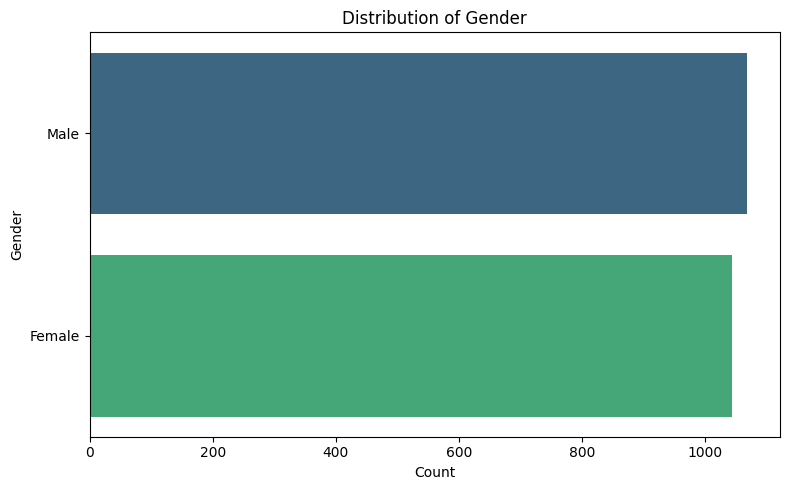

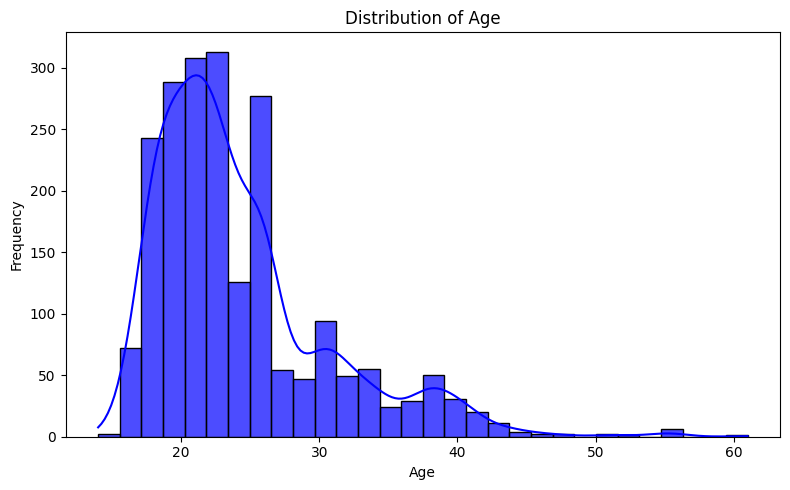

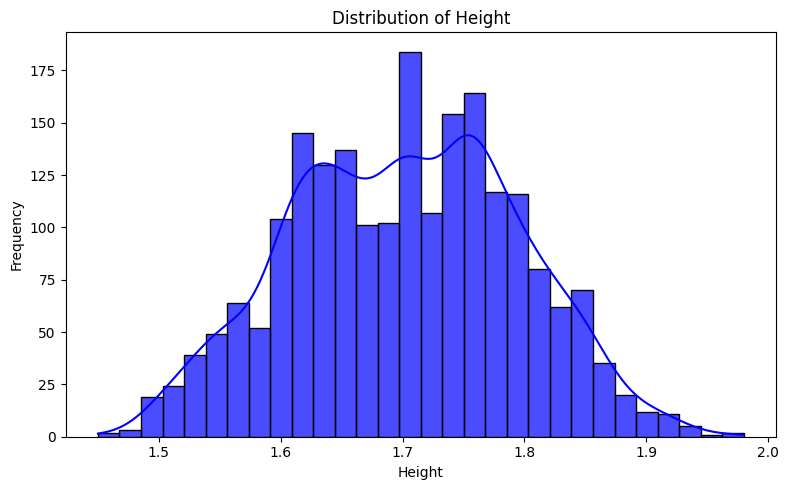

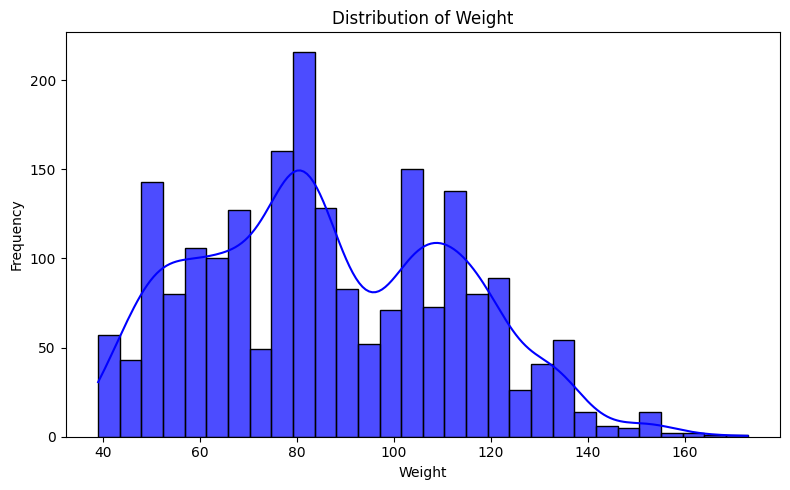

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


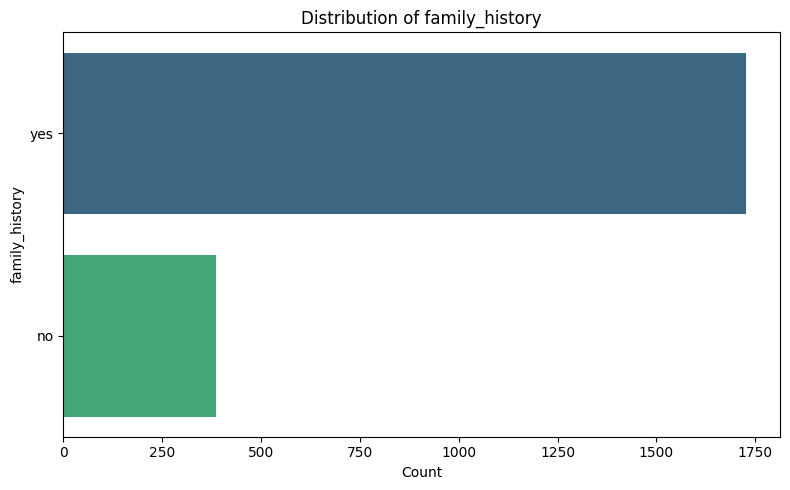

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


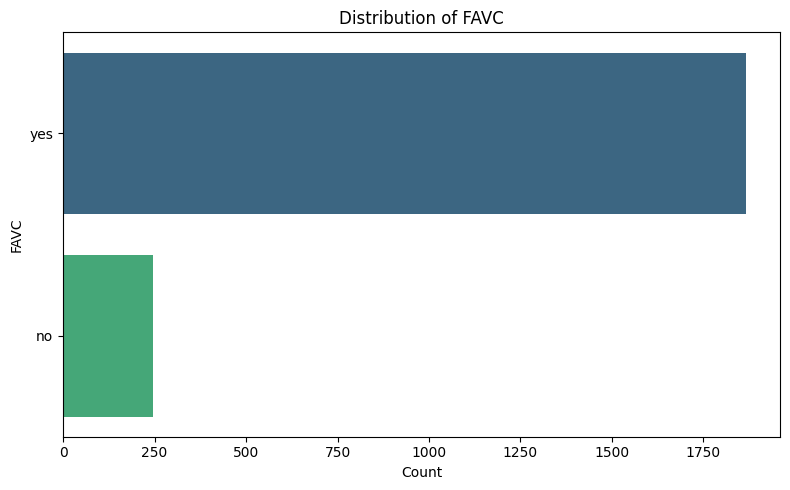

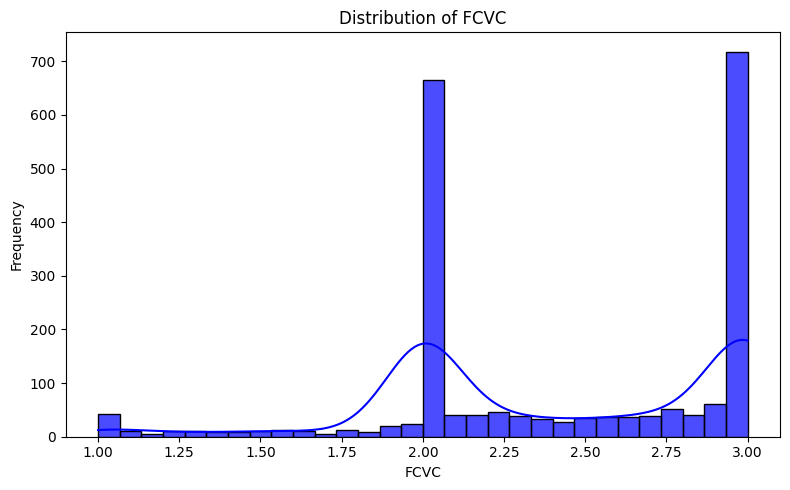

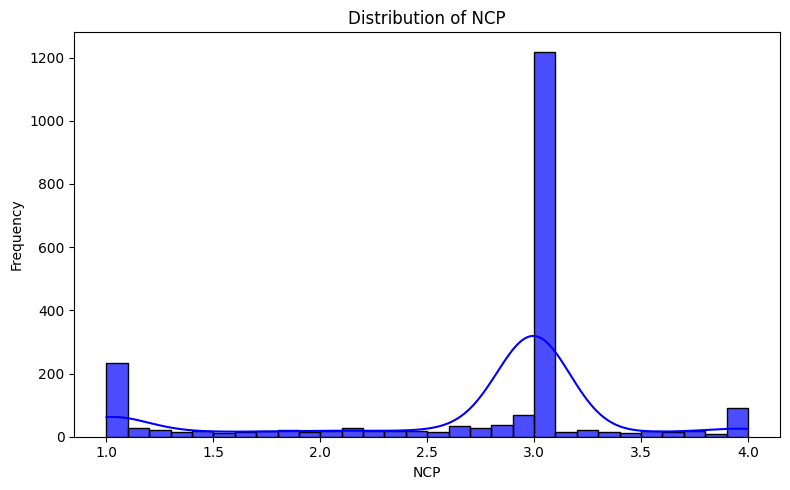

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


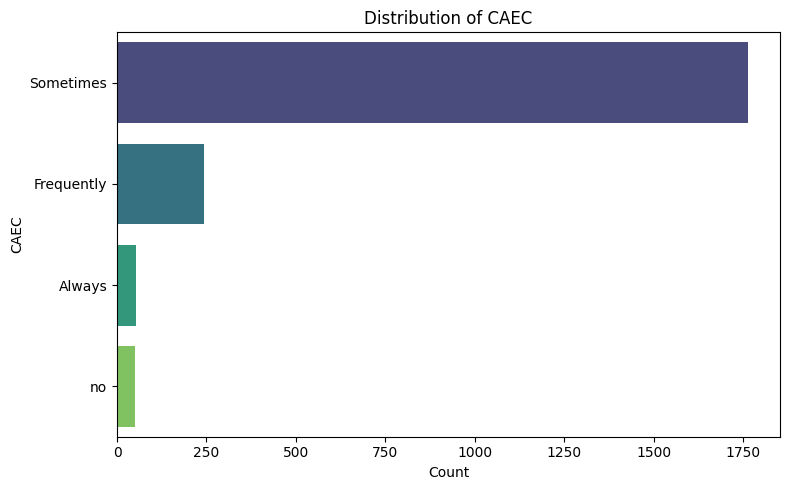

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


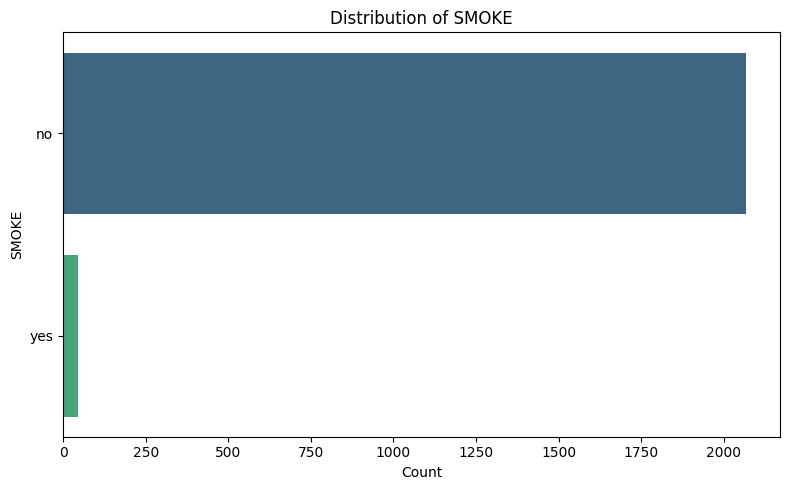

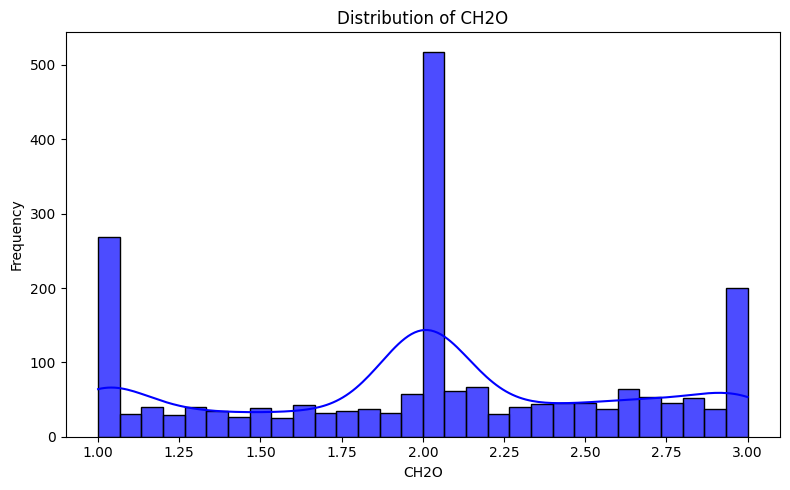

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


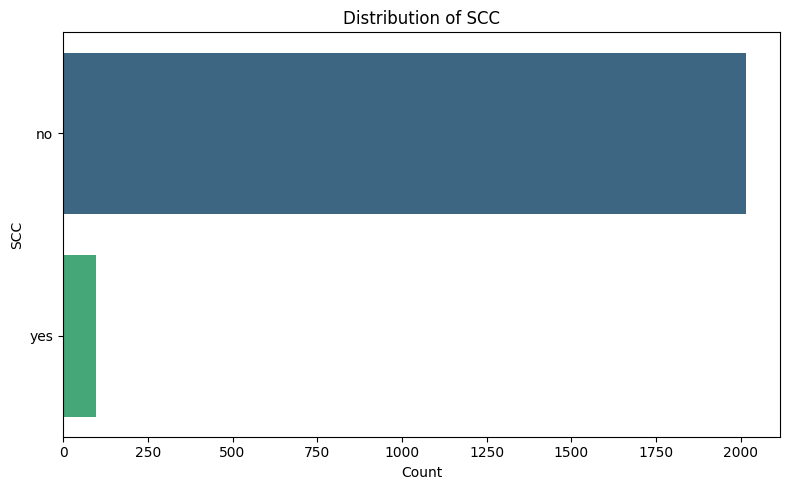

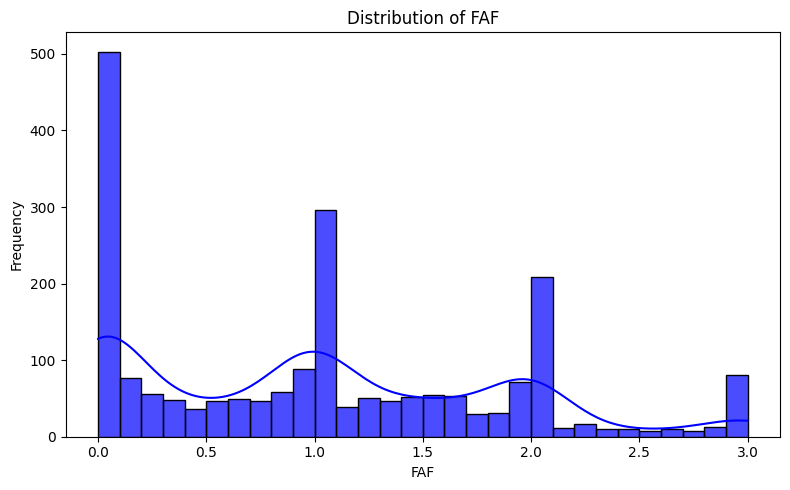

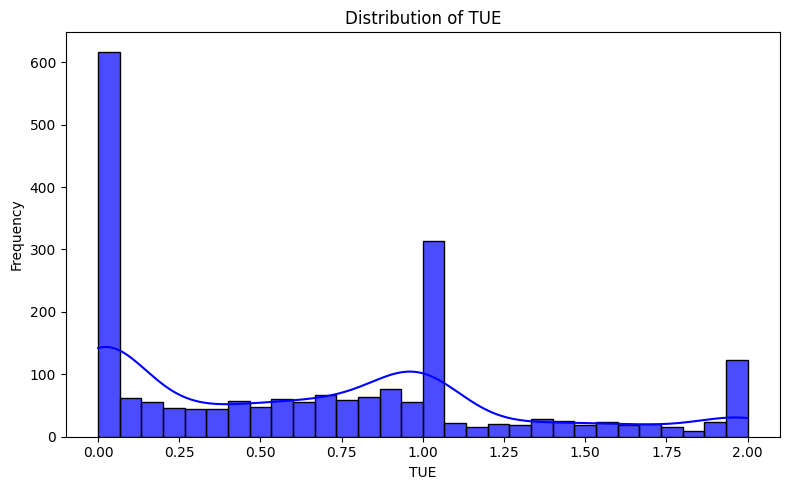

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


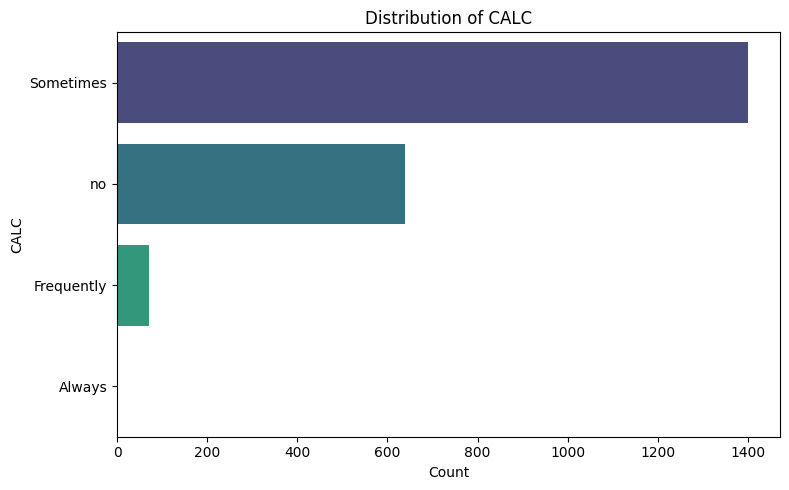

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


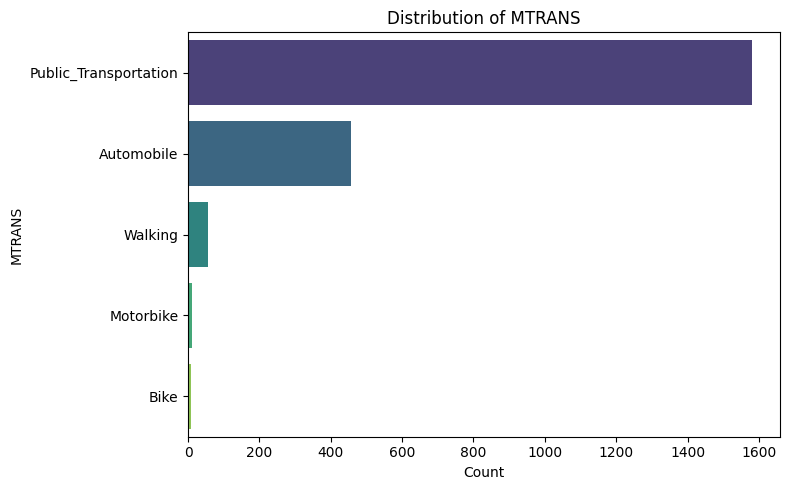

C:\Users\steve\AppData\Local\Temp\ipykernel_26956\2975741694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


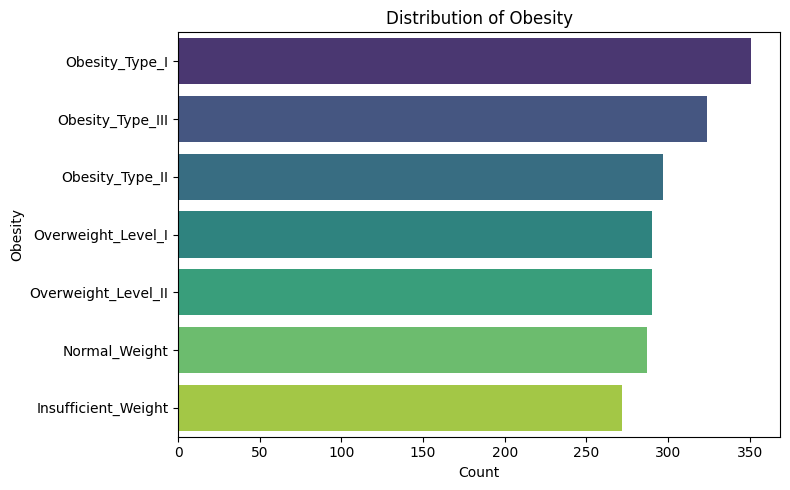

In [3]:
for column in df.columns:
    plt.figure(figsize=(8, 5))
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        # Plot categorical/discrete columns as bar plots
        sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
    else:
        # Plot numerical columns as histograms
        sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [4]:

# Define a threshold for imbalance (e.g., 90% or more in one category)
imbalance_threshold = 0.9

# Analyze categorical/discrete columns
imbalanced_columns = []
for column in df.columns:
    value_counts = df[column].value_counts(normalize=True)  # Get proportional distribution
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        max_proportion = value_counts.max()
        if max_proportion > imbalance_threshold:
            imbalanced_columns.append((column, max_proportion, value_counts.idxmax()))

# Print results
if imbalanced_columns:
    print("The following columns have an imbalance issue:")
    for column, proportion, dominant_value in imbalanced_columns:
        print(f"- Column '{column}' has {proportion:.2%} of its values as '{dominant_value}'")
else:
    print("No imbalanced columns detected based on the threshold.")


The following columns have an imbalance issue:
- Column 'SMOKE' has 97.92% of its values as 'no'
- Column 'SCC' has 95.45% of its values as 'no'


In [5]:
import numpy as np

# Calculate entropy for categorical/discrete columns
def calculate_entropy(series):
    proportions = series.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

imbalanced_columns_entropy = []
for column in df.columns:
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        entropy = calculate_entropy(df[column])
        if entropy < 0.5:  # Low entropy threshold (tune as needed)
            imbalanced_columns_entropy.append((column, entropy))

# Print entropy results
if imbalanced_columns_entropy:
    print("The following columns have low entropy, indicating imbalance:")
    for column, entropy in imbalanced_columns_entropy:
        print(f"- Column '{column}' has an entropy of {entropy:.2f}")
else:
    print("No columns with low entropy detected.")


The following columns have low entropy, indicating imbalance:
- Column 'SMOKE' has an entropy of 0.15
- Column 'SCC' has an entropy of 0.27


In [6]:
entropy = analyze_dataset_entropy(df)
display(entropy)

,Column,Entropy
0,Gender,0.999899
1,Age,2.259716
2,Height,2.855212
3,Weight,2.944318
4,family_history,0.685252
5,FAVC,0.517925
6,FCVC,2.283062
7,NCP,1.994144
8,CAEC,0.837381
9,SMOKE,0.146149


In [12]:
without_gender = df.drop(columns=['Gender','SMOKE', 'family_history', 'FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'Obesity'])
z = analyze_columns(without_gender)
display(z)

{'Age': False,
 'Height': False,
 'Weight': False,
 'FCVC': False,
 'NCP': False,
 'CH2O': False,
 'FAF': False,
 'TUE': False}

In [10]:
gini_results = calculate_gini_indices(df)
display(gini_results.sort_values(by='Gini Index', ascending=False))

c:\Users\steve\thesis\gini.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_results = pd.concat([gini_results, pd.DataFrame({'Feature': col, 'Gini Index': gini_value}, index=[0])], ignore_index=True)


,Feature,Gini Index
8,Obesity,0.856173
0,Gender,0.499930
6,CALC,0.466820
7,MTRANS,0.392199
2,family_history,0.298233
4,CAEC,0.286587
3,FAVC,0.205178
5,SCC,0.086816
1,SMOKE,0.040818
